# <span style="color:darkblue"> Laboratorio di Simulazioni Numeriche </span>
## <span style="color:purple"> Esercizio 2.2 - Random Walks 3D </span>

### Obiettivo
Studiare le proprietà statistiche di cammini casuali tridimensionali confrontando:

1. **Random Walk su reticolo cubico**: passo discreto di lunghezza $a=1$ nelle direzioni $x$, $y$, $z$
2. **Random Walk nel continuo**: passo di lunghezza $a=1$ in direzione casuale uniforme

<p style="border:2px; border-style:solid; border-color:#E6E6FA; padding: 1em; background-color:#F0F8FF">
<b>Random Walk e diffusione:</b><br>
Per un cammino casuale in 3D partendo dall'origine, la distanza quadratica media dopo $N$ passi è:
$$\langle |\vec{r}_N|^2 \rangle = \langle x_N^2 + y_N^2 + z_N^2 \rangle$$
<br>
<b>Comportamento diffusivo:</b> Se $\langle |\vec{r}_N|^2 \rangle \propto N$, allora:
$$\sqrt{\langle |\vec{r}_N|^2 \rangle} = k\sqrt{N}$$
con $k$ costante di diffusione caratteristica del sistema.
</p>

=== Exercise 02.2: 3D Random Walks ===
Steps analyzed: 1 to 100


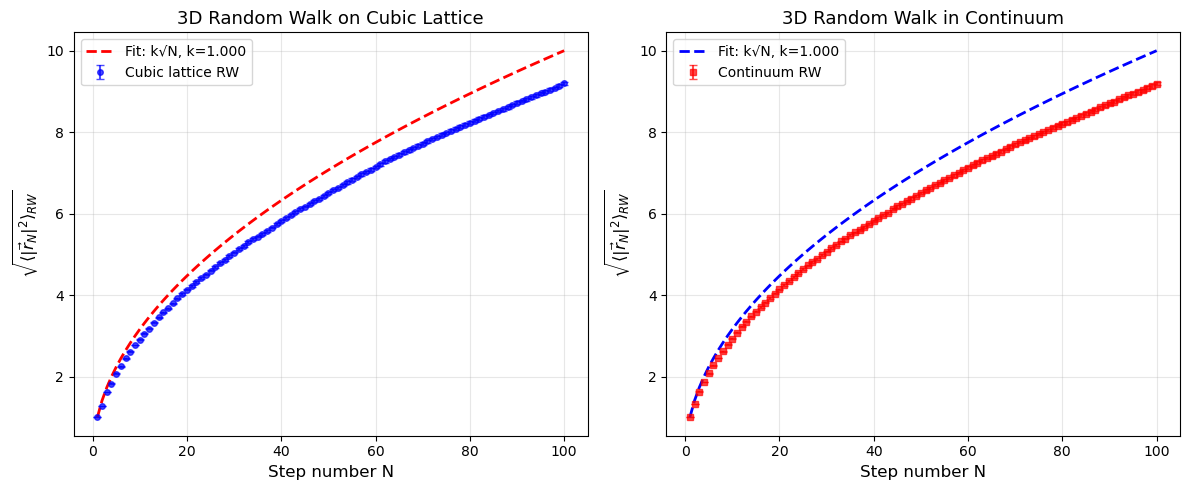


Goodness of fit (R²):
Cubic lattice:  R² = 0.930177
Continuum:      R² = 0.927399


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### **Analisi dei Random Walks 3D (Exercise 02.2)**

# Carica i dati dai file di output
data_lattice = np.loadtxt("RW_discrete.dat")
data_continuum = np.loadtxt("RW_continuum.dat")

# Estrai le colonne: passi (N), √<r²> e errori statistici
N_steps = data_lattice[:, 0].astype(int)
sqrt_r2_lattice = data_lattice[:, 1]      # √<|r_N|²> per il random walk su reticolo
err_lattice = data_lattice[:, 2]          # incertezza statistica reticolo
sqrt_r2_continuum = data_continuum[:, 1]  # √<|r_N|²> per il random walk nel continuo
err_continuum = data_continuum[:, 2]      # incertezza statistica continuo

print("=== Exercise 02.2: 3D Random Walks ===")
print(f"Steps analyzed: {N_steps[0]} to {N_steps[-1]}")

# Fit con funzione diffusiva f(N) = k√N
def diffusion_fit(N, k):
    return k * np.sqrt(N)

# Fit per entrambi i random walks usando gli errori come pesi
popt_lattice, pcov_lattice = curve_fit(diffusion_fit, N_steps, sqrt_r2_lattice, 
                                       sigma=err_lattice, absolute_sigma=True)
popt_continuum, pcov_continuum = curve_fit(diffusion_fit, N_steps, sqrt_r2_continuum,
                                          sigma=err_continuum, absolute_sigma=True)

k_lattice = popt_lattice[0]
k_continuum = popt_continuum[0]
k_err_lattice = np.sqrt(pcov_lattice[0,0])
k_err_continuum = np.sqrt(pcov_continuum[0,0])

#RW su reticolo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.errorbar(N_steps, sqrt_r2_lattice, yerr=err_lattice, fmt='o', 
             color='blue', label='Cubic lattice RW', capsize=3, markersize=4, alpha=0.7)
# fit
N_fit = np.linspace(1, 100, 100)
plt.plot(N_fit, diffusion_fit(N_fit, k_lattice), 'r--', 
         label=f'Fit: k√N, k={k_lattice:.3f}', linewidth=2)
plt.xlabel("Step number N", fontsize=12)
plt.ylabel("$\\sqrt{\\langle |\\vec{r}_N|^2 \\rangle_{RW}}$", fontsize=12)
plt.title("3D Random Walk on Cubic Lattice", fontsize=13)
plt.legend()
plt.grid(True, alpha=0.3)

# RW nel continuo
plt.subplot(1, 2, 2)
plt.errorbar(N_steps, sqrt_r2_continuum, yerr=err_continuum, fmt='s',
             color='red', label='Continuum RW', capsize=3, markersize=4, alpha=0.7)
# fit
plt.plot(N_fit, diffusion_fit(N_fit, k_continuum), 'b--',
         label=f'Fit: k√N, k={k_continuum:.3f}', linewidth=2)
plt.xlabel("Step number N", fontsize=12)
plt.ylabel("$\\sqrt{\\langle |\\vec{r}_N|^2 \\rangle_{RW}}$", fontsize=12)
plt.title("3D Random Walk in Continuum", fontsize=13)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#R² 
def calculate_r_squared(y_observed, y_predicted):
    ss_res = np.sum((y_observed - y_predicted) ** 2)
    ss_tot = np.sum((y_observed - np.mean(y_observed)) ** 2)
    return 1 - (ss_res / ss_tot)

r2_lattice = calculate_r_squared(sqrt_r2_lattice, diffusion_fit(N_steps, k_lattice))
r2_continuum = calculate_r_squared(sqrt_r2_continuum, diffusion_fit(N_steps, k_continuum))

# comportamento diffusivo
print(f"\nGoodness of fit (R²):")
print(f"Cubic lattice:  R² = {r2_lattice:.6f}")
print(f"Continuum:      R² = {r2_continuum:.6f}")


### **Interpretazione dei Risultati**

L'analisi dei random walks 3D rivela caratteristiche fondamentali dei processi diffusivi:

**Comportamento Diffusivo:**
- Entrambi i cammini seguono la legge $\sqrt{\langle |\vec{r}_N|^2 \rangle} = k\sqrt{N}$
- Questo conferma il carattere diffusivo: la distanza tipica cresce come $\sqrt{N}$

**Confronto Reticolo vs Continuo:**
- **Reticolo cubico**: limitato a 6 direzioni discrete ($\pm x, \pm y, \pm z$)
- **Continuo**: direzioni uniformemente distribuite sulla sfera unitaria

**Qualità del Fit:**
- R² vicino a 1 conferma l'accordo con la legge di diffusione teorica
